### Investigating the appropriate scaling for each feature in the target vector ###

In [16]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
df = pd.read_csv("../data/smiles_and_targets.csv")

properties_names = ['A', 'B', 'C', 'mu', 'alfa', 'homo', 'lumo', 'gap', 'R²', 'zpve', 'U0', 'U', 'H', 'G', 'Cv']

targets = df[properties_names]
print("Number of samples in final dataset:", len(df))

Number of samples in final dataset: 132820


Characterize the distributions of the features

In [18]:
targets.describe()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv
count,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000
mean,3.365779,1.395758,1.117132,2.683599,75.240854,-0.240008,0.011289,0.251298,1188.422817,0.148748,-411.946590,-411.938115,-411.937171,-411.980005,31.631034
std,1.182539,0.437445,0.317488,1.438735,8.014609,0.021858,0.046864,0.047207,273.383329,0.033118,39.214154,39.213956,39.213956,39.214635,4.016353
min,0.000000,0.340580,0.334610,0.000000,26.440000,-0.396300,-0.175000,0.037600,242.930800,0.015951,-714.568050,-714.560200,-714.559200,-714.602100,10.398000
25%,2.551297,1.094428,0.911948,1.588400,70.427500,-0.252500,-0.023600,0.216500,1018.592475,0.125422,-437.914585,-437.906355,-437.905415,-437.948210,28.962000
50%,3.083955,1.371380,1.079445,2.495500,75.520000,-0.241000,0.012200,0.249600,1147.332850,0.148420,-417.922685,-417.915750,-417.914810,-417.954560,31.569000
75%,3.815260,1.654020,1.279422,3.626825,80.520000,-0.228700,0.049400,0.288300,1307.602325,0.171211,-387.055270,-387.046193,-387.045253,-387.089300,34.285000
max,9.992530,4.850850,4.732690,9.971700,119.230000,-0.125300,0.108200,0.480200,3374.753200,0.273944,-153.459840,-153.455440,-153.454500,-153.482620,46.969000


C:\Users\Jesper\AppData\Local\Temp\ipykernel_28232\474093122.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  hist = targets.hist(bins=25, ax=ax)


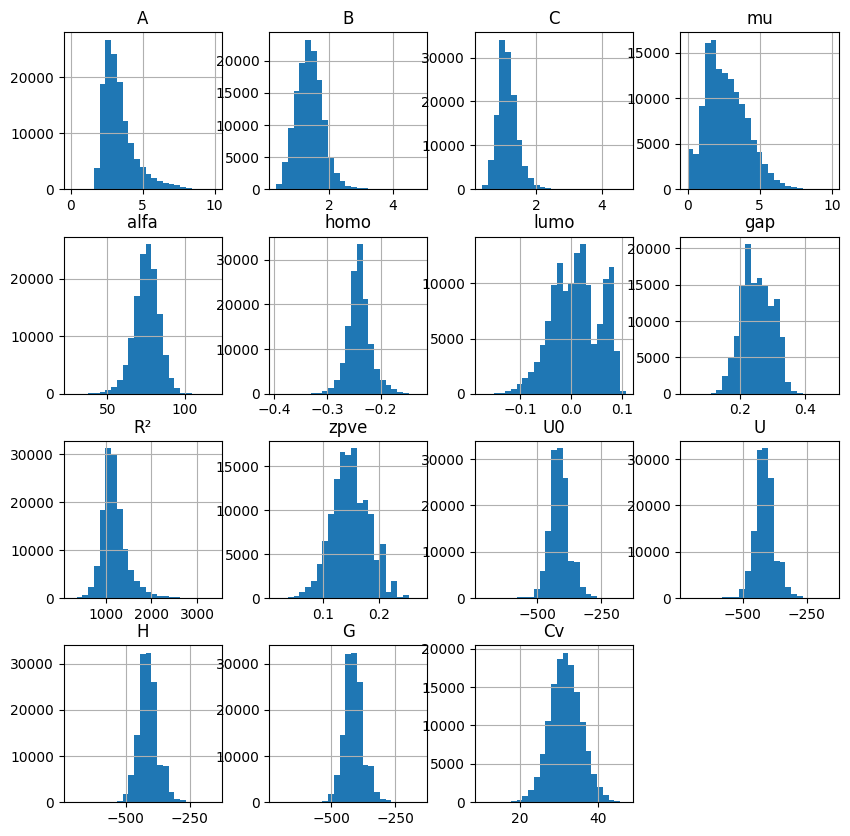

In [19]:
# plot histograms of values in each column
ax = plt.figure(figsize=(10,10))
hist = targets.hist(bins=25, ax=ax)

Scale the features and re-examine distirbutions after scaling

In [20]:
from utility_functions import get_data_split_indices, scale_targets
from sklearn.preprocessing import StandardScaler

num_samples = np.shape(targets)[0]
train_indices, val_indices, test_indices = get_data_split_indices(num_samples, 0.15, 0.1)


target_values = targets.values
train_targets = target_values[train_indices, :]
val_targets = target_values[val_indices, :]
test_targets = target_values[test_indices, :]

# train_targets, val_targets, test_targets, scaler = scale_targets(train_targets, val_targets, test_targets)
scaler = StandardScaler()
train_targets = scaler.fit_transform(train_targets)
val_targets = scaler.transform(val_targets)
test_targets = scaler.transform(test_targets)

scaled_target_values = np.vstack((train_targets, val_targets, test_targets))

targets_scaled = targets.copy()
for idx, col_name in enumerate(properties_names):
    targets_scaled[col_name] = scaled_target_values[:,idx] 

print("First rows before scaling:")
print(targets.values[0:2,:])
print("First rows after scaling:")
print(targets_scaled.values[0:2,:])

First rows before scaling:
[[ 0.0000000e+00  4.4259725e+00  4.4259725e+00  0.0000000e+00
   3.8520000e+01 -2.5990000e-01 -2.1400000e-02  2.3860000e-01
   2.7862640e+02  3.7354000e-02 -1.5345984e+02 -1.5345544e+02
  -1.5345450e+02 -1.5348262e+02  1.5312000e+01]
 [ 0.0000000e+00  4.5793223e+00  4.5793223e+00  3.7920000e+00
   3.2660000e+01 -3.1020000e-01 -5.4300000e-02  2.5590000e-01
   2.6018960e+02  2.7259000e-02 -1.6955775e+02 -1.6955376e+02
  -1.6955283e+02 -1.6958102e+02  1.2930000e+01]]
First rows after scaling:
[[-0.46177974 -0.25031851 -0.29234056 -0.5391056   0.43015481  0.49233037
   1.46642137  1.22638411  0.21815052  0.96847464 -0.31112757 -0.31110632
  -0.31110591 -0.31115272  0.75797772]
 [ 0.7022506   0.46965716  1.1178461  -1.01777864 -0.07272173  0.57018853
   0.11307652 -0.15137361 -1.02912256 -0.32351875  0.69836098  0.69830877
   0.69830866  0.69843572 -1.08836064]]


In [6]:
targets_scaled = pd.DataFrame(scaled_target_values, columns=properties_names)
targets_scaled.describe()

,A,B,C,mu,alfa,homo,lumo,gap,R²,zpve,U0,U,H,G,Cv
count,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000,1.328200e+05,132820.000000,132820.000000,132820.000000,132820.000000,132820.000000
mean,0.002141,-0.000402,-0.000855,-0.000686,-0.001312,-0.002683,-0.000286,0.000955,0.000785,-7.526408e-07,0.000923,0.000923,0.000923,0.000923,-0.000892
std,1.002477,1.000890,1.000552,0.999541,1.002577,1.001086,1.000364,0.999067,1.002107,1.003024e+00,1.001258,1.001258,1.001258,1.001258,1.001289
min,-2.851140,-2.414684,-2.466947,-1.865079,-6.105989,-7.160669,-3.976843,-4.521680,-3.464988,-4.021959e+00,-7.725934,-7.725990,-7.725988,-7.725855,-5.294352
25%,-0.688321,-0.689856,-0.647487,-0.761560,-0.603432,-0.574784,-0.745038,-0.735492,-0.621741,-7.064693e-01,-0.662119,-0.662129,-0.662129,-0.662117,-0.666291
50%,-0.236770,-0.056179,-0.119624,-0.131365,0.033608,-0.048097,0.019154,-0.034973,-0.149834,-9.931940e-03,-0.151665,-0.151705,-0.151705,-0.151624,-0.016358
75%,0.383181,0.590511,0.510598,0.654607,0.659076,0.515230,0.813230,0.784063,0.437646,6.803285e-01,0.636475,0.636494,0.636494,0.636452,0.660750
max,5.619855,7.904967,11.393454,5.062619,5.501452,5.250838,2.068382,4.845379,8.014945,3.791755e+00,6.600886,6.600816,6.600816,6.601076,3.822909


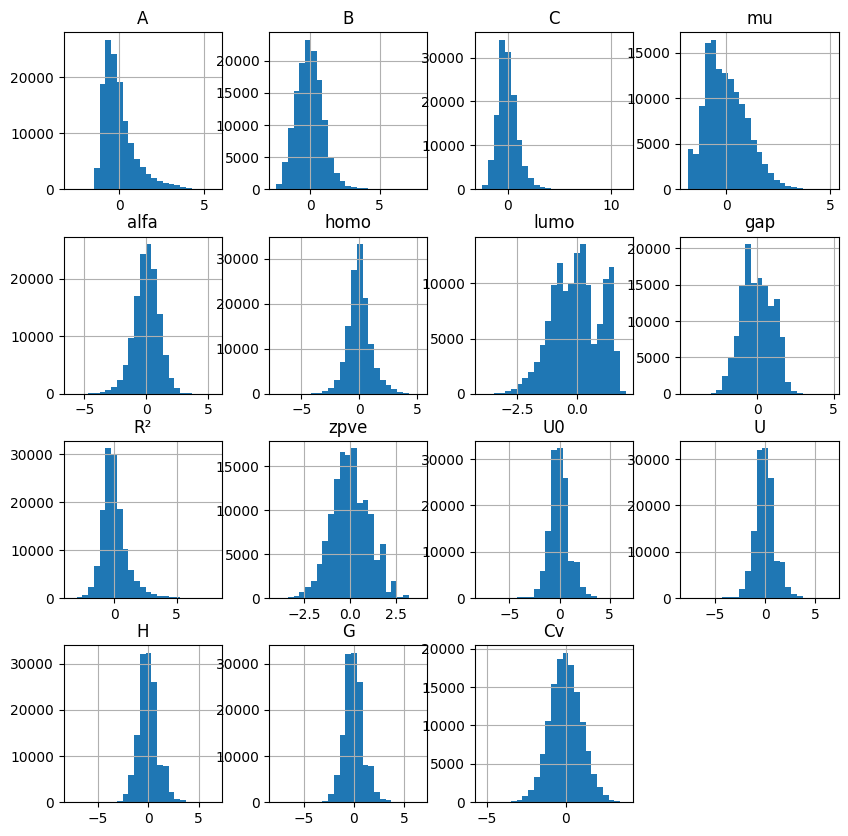

In [7]:
hist = targets_scaled.hist(bins=25, figsize=(10,10))

In [8]:
train_targets_df = pd.DataFrame(train_targets, columns=properties_names)
val_targets_df = pd.DataFrame(val_targets, columns=properties_names)
test_targets_df = pd.DataFrame(test_targets, columns=properties_names)

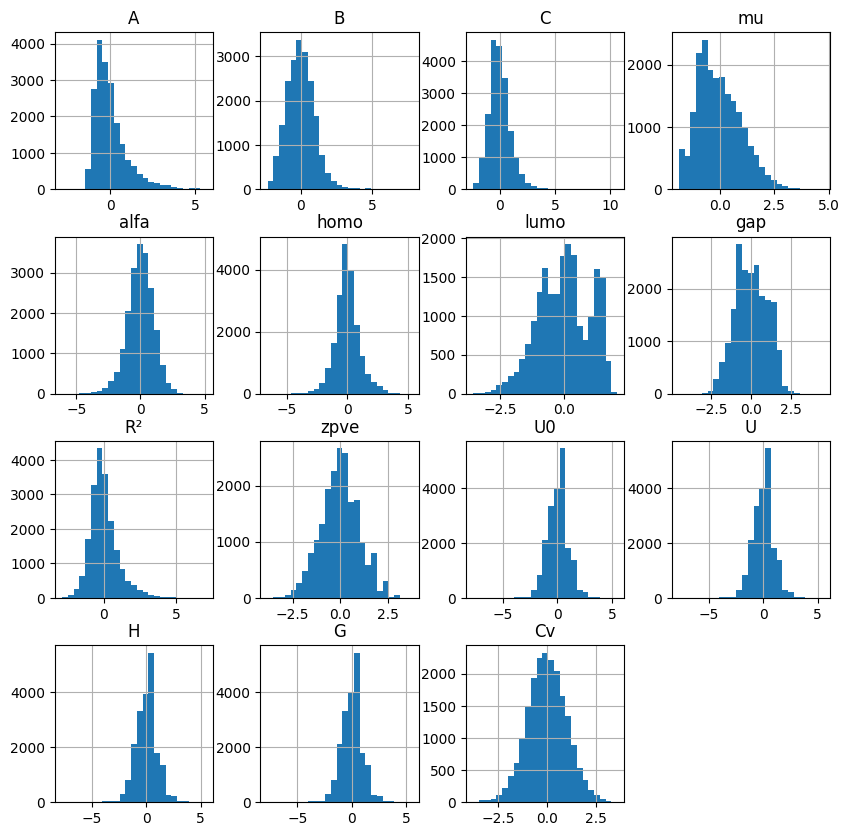

In [9]:
hist = val_targets_df.hist(bins=25, figsize=(10,10))